In [75]:
#Part A - Q1 A - Clearly write outcome of data analysis(Minimum 2 points)

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

blogs_df = pd.read_csv('./blogs.zip')
blogs_df.shape

(681284, 7)

In [10]:
#NOTE : There are a total of 681284 blogs to be analysed

In [11]:
blogs_df.sample(n=10)

,id,gender,age,topic,sign,date,text
83702,1739407,female,33,indUnk,Scorpio,"30,July,2004",'As aliens detained by the military ...
38344,2663008,male,24,Non-Profit,Cancer,"19,January,2004",This is a dream that I had on 11/1...
677869,3413707,male,15,Chemicals,Taurus,"11,June,2004",I'M GOING TO A STYX AND PETER FRAMP...
540303,3581641,male,14,Student,Pisces,"08,June,2004",urlLink Here is a picture of my...
104792,3408861,male,15,indUnk,Aries,"21,May,2004",WOw!!going out again todae??wad kind of...
243234,3606815,male,25,Government,Leo,"25,June,2004",
213649,3513784,female,23,Non-Profit,Aquarius,"17,June,2004",... OR EVEN A SHITY WEEK? I know t...
392010,1983674,male,25,indUnk,Scorpio,"08,June,2004",I just want to share this with everyone...
196105,823780,male,17,Education,Scorpio,"01,August,2004","urlLink , 'This is still not a speci..."
89897,1135804,male,33,indUnk,Libra,"15,May,2003",spend some time with some other men fro...


In [12]:
#Check if any column in null
blogs_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [13]:
#Note no columns are null

<AxesSubplot:xlabel='gender', ylabel='count'>

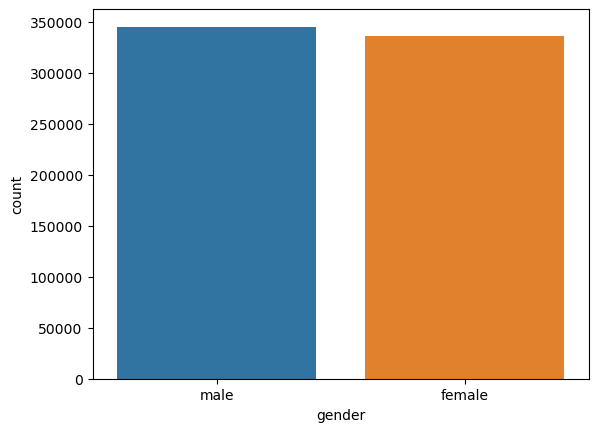

In [14]:
#Validating if a particular gender has written higher blogs
sns.countplot(x='gender', data=blogs_df)

In [15]:
#Almost same number of blogs written by male and female bloggers

/var/folders/d1/cxdjwgp51f5d7gdfhsq3484h0000gn/T/ipykernel_684/3280365451.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha="right")


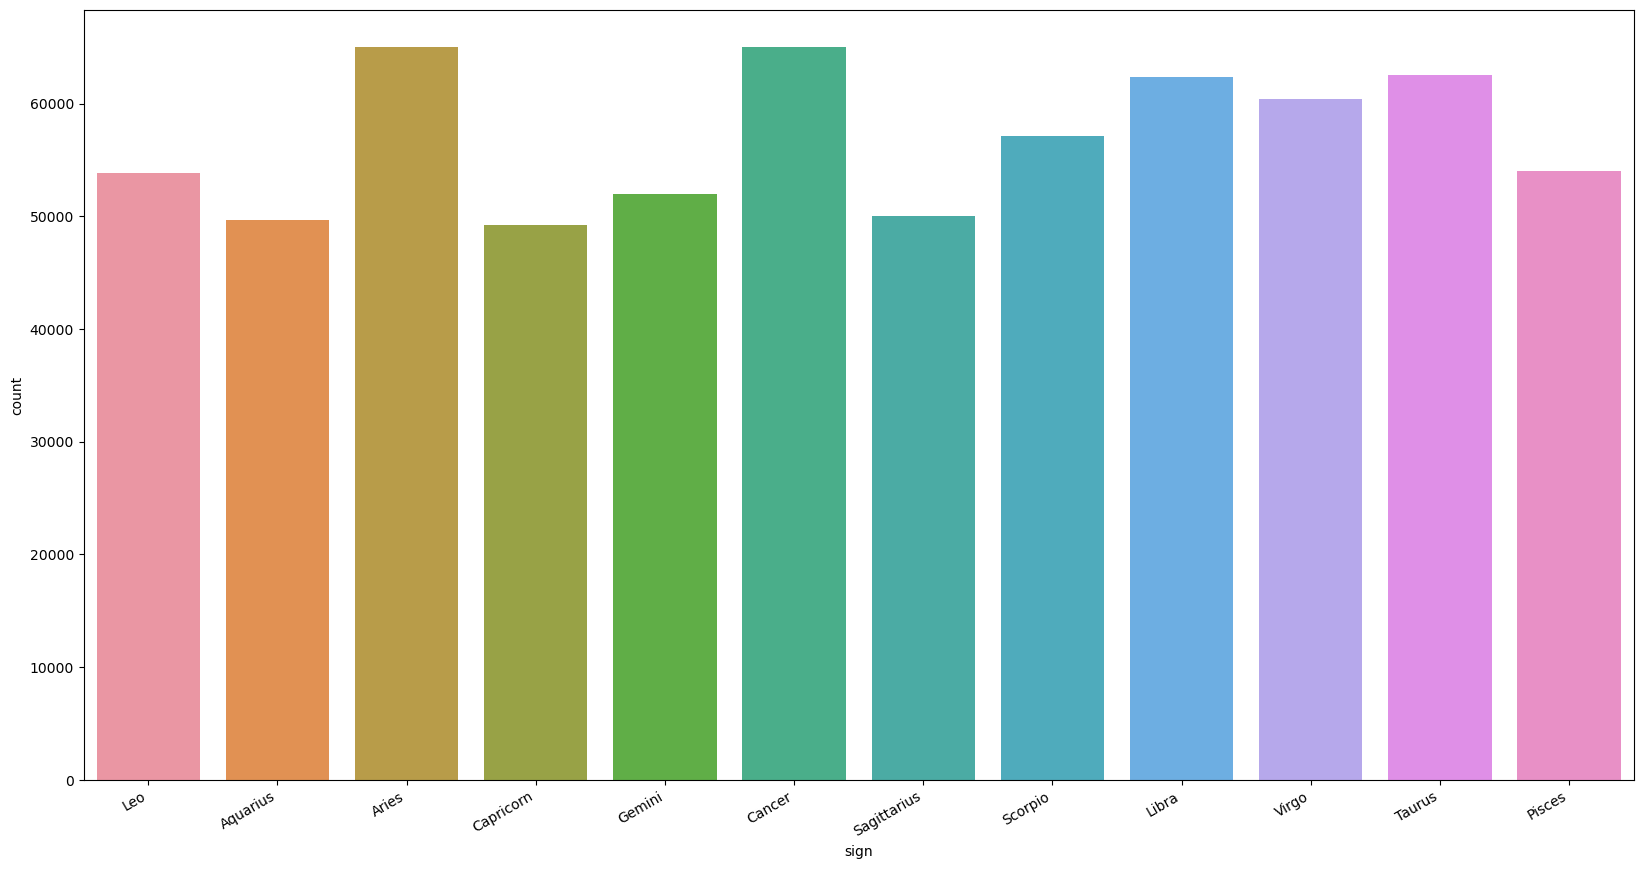

In [16]:
#Check if any sun sign writes higer number of plots
fig, ax=plt.subplots(figsize=(20,10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha="right")
sns.countplot(data=blogs_df,x='sign',ax=ax)
plt.show()

In [17]:
# Aries and Cancer sun sing write higher number of blogs. Capricorn lowest number.

/var/folders/d1/cxdjwgp51f5d7gdfhsq3484h0000gn/T/ipykernel_684/3871707964.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha="right")


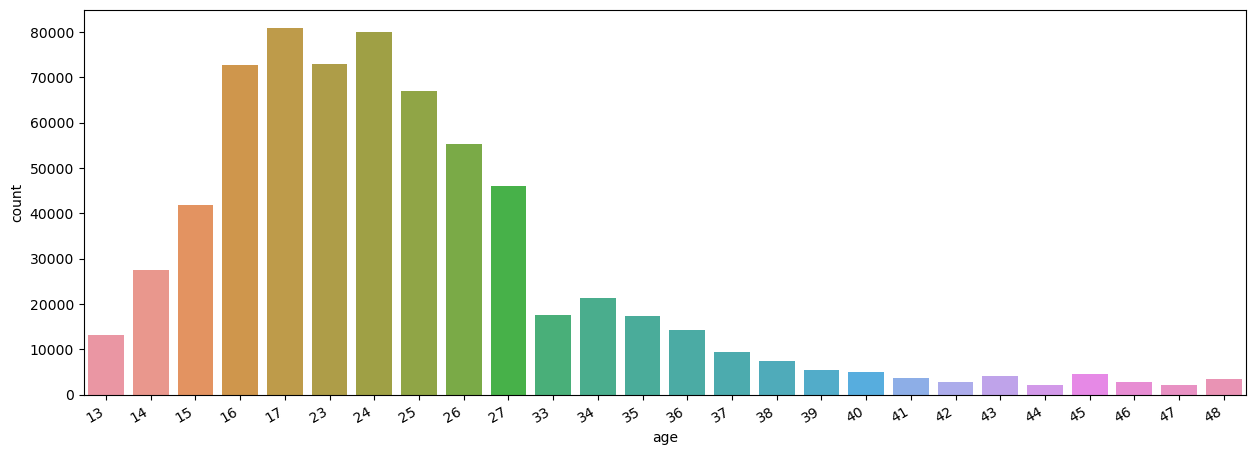

In [18]:
#Checking which age group writes higher number of blogs
fig, ax=plt.subplots(figsize=(15,5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha="right")
sns.countplot(data=blogs_df,x='age',ax=ax)
plt.show()

In [19]:
#Note: Maximum blogs written between age 16 to 25. With increase in age number of people writing blogs reduces.

/var/folders/d1/cxdjwgp51f5d7gdfhsq3484h0000gn/T/ipykernel_684/2803572224.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha="right")


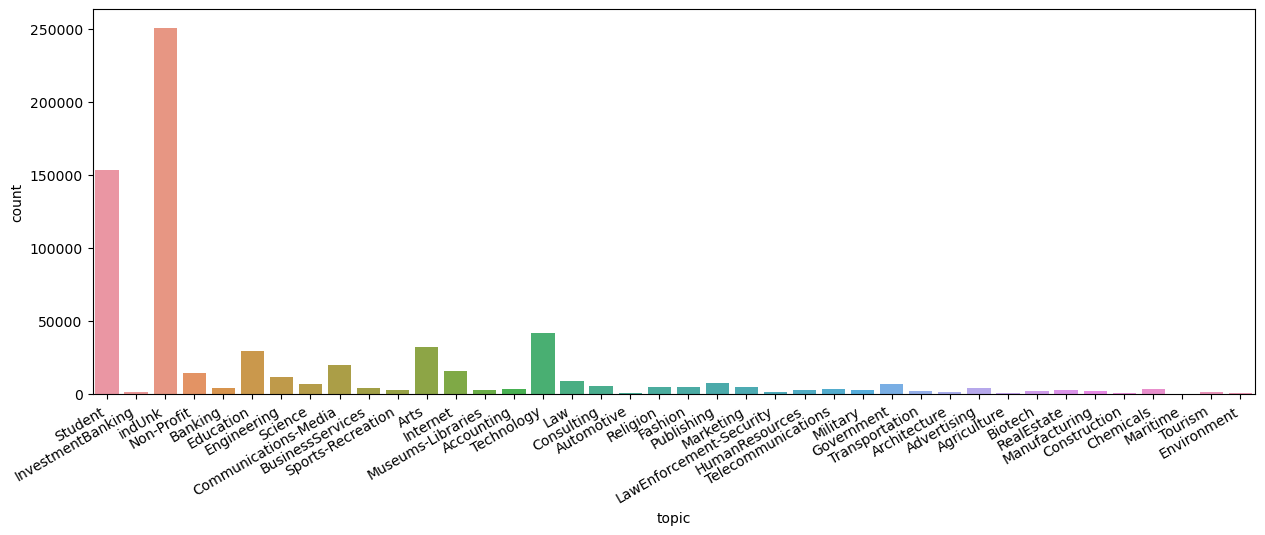

In [20]:
#Check On which topic maximum blogs are written 
fig, ax=plt.subplots(figsize=(15,5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha="right")
sns.countplot(data=blogs_df,x='topic',ax=ax)
plt.show()

In [21]:
# Maximum blogs written on topic on indUnk

In [22]:
# Part A - Q1 A - Clearly write outcome of data analysis(Minimum 2 points)
    #1) Data set has 681284 blogs
    #2) Almost equal number of blogs written by male and female bloggers
    #3) Aries and Cancer sun sing write higher number of blogs. Capricorns write lowest number of blogs.
    #4) Maximum blogs written between age 16 to 25. With increase in age number of people writing blogs reduces.
    #5) Maximum blogs written on topic on indUnk

In [23]:
# Part A - Q1 A - Clean the Structured Data

In [24]:
blogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [25]:
# No Null values 

In [26]:
!pip install langdetect


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [27]:
#Consideing only 100000/681284 for analysis as system resources memory and cpu not enough to handle this data
blogs_df = blogs_df.sample(n=100000)
blogs_df.reset_index(inplace=True, drop=True)

In [28]:
from langdetect import detect

def en_lang(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [29]:
blogs_df = blogs_df[blogs_df['text'].apply(en_lang)]

In [30]:
blogs_df.shape

(95583, 7)

In [31]:
# Removed those rows that were not English. Out of 95691/10000 remained post English language tcheck. 

In [32]:
#Part A - Q2 A - Eliminate All special Characters and Numbers

In [33]:
#If its not a upper or lower case alphabet replace it with space
import re
blogs_df['clean_text']=blogs_df['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [34]:
#Part A - Q2 B - Lowercase all textual data

In [35]:
blogs_df['clean_text']=blogs_df['clean_text'].apply(lambda x: x.lower())

In [36]:
#Part A - Q2 C - Remove all Stopwords

In [37]:
!pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
blogs_df.text = blogs_df.text.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
#Part A - Q3 A - Create dependent and independent variables

In [40]:
blogs_df = blogs_df[['text','topic']]
X = blogs_df['text']
y = blogs_df['topic']

In [41]:
X

0        Things stopped now. More updates information b...
1        Brought JPServicez.com: Smart bargain shopping...
2        Brought JPServicez.com: Smart bargain shopping...
3        First all, I say I tried run 30 minutes I woul...
4        played doom 3 weekend dave's. hella-disappointed.
                               ...                        
99995    You know I thought... Paul probably calling co...
99996    Went 2 camp today still nothing much happened....
99997    Commercial Club Sounds good, night celebrate w...
99998                 urlLink 4th outfit day&nbsp; urlLink
99999    I returned quick trip beach friend Nikki. Each...
Name: text, Length: 95583, dtype: object

In [42]:
y

0                indUnk
1        Transportation
2        Transportation
3            Technology
4             Chemicals
              ...      
99995            indUnk
99996           Student
99997        Government
99998            indUnk
99999         Education
Name: topic, Length: 95583, dtype: object

In [43]:
#Part A - Q3 B - Split data into train and test.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=11, test_size=0.2, stratify=y)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76466,)
(19117,)
(76466,)
(19117,)


In [46]:
#Part A - Q3 C - Vectorize data using any one vectorizer.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_ct = vectorizer.fit_transform(X_train)
X_train_ct.shape

(76466, 4484751)

In [48]:
## Fit and transform on test data
X_test_ct = vectorizer.transform(X_test)
X_test_ct.shape

(19117, 4484751)

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(y_train)
y_train = labelencoder.transform(y_train)

In [50]:
y_test = labelencoder.transform(y_test)

In [51]:
#Part A - Q3 D - Build a base model for Supervised Learning - Classification.

In [52]:
######################  Building a LinearSVC ###################### 
from sklearn.svm import LinearSVC
model = LinearSVC(C=1.0, dual=True, loss='squared_hinge')
model.fit(X_train_ct, y_train)
y_pred_class = model.predict(X_test_ct)
print("Number of Features : ", X_train_ct.shape[1])
print("Training Accuracy : ",model.score(X_train_ct,y_train))
print("Testing Accuracy : ", model.score(X_test_ct,y_test))

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Number of Features :  4484751
Training Accuracy :  0.9858499202259828
Testing Accuracy :  0.34168541089083015


In [53]:
#Part A - Q3 E - Clearly print Performance Metrics.

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print("************************************************************")
print("**************Classification Report LinearSVC***************")
print("************************************************************")
print(classification_report(y_test, y_pred_class))

************************************************************
**************Classification Report LinearSVC***************
************************************************************
              precision    recall  f1-score   support

           0       0.16      0.04      0.07       112
           1       0.00      0.00      0.00       133
           2       0.00      0.00      0.00        34
           3       0.25      0.05      0.08        44
           4       0.16      0.11      0.13       898
           5       0.33      0.05      0.09        37
           6       0.18      0.07      0.10       112
           7       0.22      0.03      0.06        62
           8       0.23      0.06      0.09       127
           9       0.00      0.00      0.00       108
          10       0.11      0.06      0.08       561
          11       0.20      0.03      0.06        30
          12       0.08      0.03      0.04       173
          13       0.16      0.10      0.12       856
      

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
#Part A - Q4 A - Experiment with other vectorisers.

In [56]:
#Using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(ngram_range=(1, 2))
tv.fit_transform(X_train)
#Check the vocabluray size
len(tv.vocabulary_)

4484751

In [57]:
#Convert Training blog text into Count Vectors
X_train_tv = tv.transform(X_train)
#Document Term Matrix size
X_train_tv.shape

(76466, 4484751)

In [58]:
# Transform test data
X_test_tv = tv.transform(X_test)
X_test_tv.shape

(19117, 4484751)

In [59]:
## Rechecking the accuracy with TfidfVectorizer
from sklearn.svm import LinearSVC
model = LinearSVC(C=1.0, dual=True, loss='squared_hinge')
model.fit(X_train_tv, y_train)
y_pred_class = model.predict(X_test_tv)
print("Number of Features : ", X_train_tv.shape[1])
print("Training Accuracy : ",model.score(X_train_tv,y_train))
print("Testing Accuracy : ", model.score(X_test_tv,y_test))

Number of Features :  4484751
Training Accuracy :  0.9851960348390134
Testing Accuracy :  0.4068106920541926


In [60]:
# Part A - Q4 A - Experiment with other vectorisers.
# Testing Accuracy improved by ~6% which is a singificant impovment. 

In [61]:
print("************************************************************")
print("******Classification report LinearSVC + TfidfVectorizer*****")
print("************************************************************")
print(classification_report(y_test, y_pred_class))

************************************************************
****Classification report LinearSVC with TfidfVectorizer****
************************************************************
              precision    recall  f1-score   support

           0       0.08      0.01      0.02       112
           1       0.40      0.02      0.03       133
           2       0.33      0.03      0.05        34
           3       0.00      0.00      0.00        44
           4       0.35      0.08      0.12       898
           5       1.00      0.05      0.10        37
           6       0.42      0.04      0.08       112
           7       0.40      0.03      0.06        62
           8       0.62      0.06      0.11       127
           9       0.05      0.01      0.02       108
          10       0.35      0.06      0.10       561
          11       0.50      0.03      0.06        30
          12       0.23      0.02      0.03       173
          13       0.32      0.08      0.12       856
      

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
#Part A - Q4 B - Build classifier Models using other algorithms than base model.

In [63]:
# Using Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_tv, y_train)
y_pred_class = model.predict(X_test_tv)
print("Number of Features : ", X_train_tv.shape[1])
print("Training Accuracy : ",model.score(X_train_tv,y_train))
print("Testing Accuracy : ", model.score(X_test_tv,y_test))

Number of Features :  4484751
Training Accuracy :  0.384628462323124
Testing Accuracy :  0.37113563843699326


In [64]:
#Part A - Q4 C - Tune Parameters/Hyperparameters of the model/s.

In [65]:
# defining parameter range
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.01, 0.1, 0.5, 1.0 ],
         }
 
grid = GridSearchCV(MultinomialNB(), params, refit = True, verbose = 3, cv= 5)
# fitting the model for grid search
grid.fit(X_train_tv, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........................alpha=0.01;, score=0.348 total time=  11.2s
[CV 2/5] END ........................alpha=0.01;, score=0.335 total time=   9.0s
[CV 3/5] END ........................alpha=0.01;, score=0.340 total time=   9.0s
[CV 4/5] END ........................alpha=0.01;, score=0.337 total time=   9.0s
[CV 5/5] END ........................alpha=0.01;, score=0.338 total time=   8.9s
[CV 1/5] END .........................alpha=0.1;, score=0.384 total time=   9.0s
[CV 2/5] END .........................alpha=0.1;, score=0.386 total time=   9.0s
[CV 3/5] END .........................alpha=0.1;, score=0.385 total time=   9.0s
[CV 4/5] END .........................alpha=0.1;, score=0.387 total time=   9.0s
[CV 5/5] END .........................alpha=0.1;, score=0.385 total time=   9.0s
[CV 1/5] END .........................alpha=0.5;, score=0.372 total time=   8.9s
[CV 2/5] END .........................alpha=0.5;,

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0]}, verbose=3)

In [66]:
print(grid.best_params_)

{'alpha': 0.1}


In [67]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.1)
model.fit(X_train_tv, y_train)
y_pred_class = model.predict(X_test_tv)
print("Number of Features : ", X_train_tv.shape[1])
print("Training Accuracy : ",model.score(X_train_tv,y_train))
print("Testing Accuracy : ", model.score(X_test_tv,y_test))

Number of Features :  4484751
Training Accuracy :  0.6295085397431538
Testing Accuracy :  0.385520740701993


In [68]:
#Part A - Q4 C - Not much improvment in testing accuracy 

In [69]:
#Part A - Q4 D - Clearly print Performance Metrics.

In [70]:
print("************************************************************")
print("***********Classification report MultinomialNB**************")
print("************************************************************")
print(classification_report(y_test, y_pred_class))

************************************************************
***********Classification report MultinomialNB**************
************************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.00      0.00      0.00       133
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        44
           4       0.11      0.00      0.00       898
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00       112
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00       127
           9       0.00      0.00      0.00       108
          10       1.00      0.00      0.01       561
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00       173
          13       1.00      0.00      0.00       856
      

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear',penalty='l1')
model.fit(X_train_tv, y_train)
y_pred_class = model.predict(X_test_tv)
print("Number of Features : ", X_train_tv.shape[1])
print("Training Accuracy : ",model.score(X_train_tv,y_train))
print("Testing Accuracy : ", model.score(X_test_tv,y_test))

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Number of Features :  4484751
Training Accuracy :  0.42061831402191824
Testing Accuracy :  0.40482293246848355


In [72]:
print("************************************************************")
print("***********Classification report LogisticRegresson**********")
print("************************************************************")
print(classification_report(y_test, y_pred_class))

************************************************************
***********Classification report LogisticRegresson**********
************************************************************
              precision    recall  f1-score   support

           0       0.31      0.04      0.08       112
           1       0.00      0.00      0.00       133
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        44
           4       0.54      0.03      0.05       898
           5       0.00      0.00      0.00        37
           6       1.00      0.02      0.04       112
           7       1.00      0.02      0.03        62
           8       0.33      0.03      0.06       127
           9       0.00      0.00      0.00       108
          10       0.40      0.01      0.02       561
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00       173
          13       0.56      0.05      0.09       856
      

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=50)
model.fit(X_train_tv, y_train)
y_pred_class = model.predict(X_test_tv)
print("Number of Features : ", X_train_tv.shape[1])
print("Training Accuracy : ",model.score(X_train_tv,y_train))
print("Testing Accuracy : ", model.score(X_test_tv,y_test))

Number of Features :  4484751
Training Accuracy :  0.3819867653597677
Testing Accuracy :  0.37286185070879324


In [74]:
print("************************************************************")
print("*******Classification report RandomForestClassifier*********")
print("************************************************************")
print(classification_report(y_test, y_pred_class))

************************************************************
*******Classification report RandomForestClassifier*********
************************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.00      0.00      0.00       133
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        44
           4       1.00      0.00      0.01       898
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00       112
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00       127
           9       0.00      0.00      0.00       108
          10       0.00      0.00      0.00       561
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00       173
          13       0.00      0.00      0.00       856
      

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Part A - Q5 A - Which vectorizer performed better? Probable reason?.
#### Ans : Vectoriser TfidfVectorizer beformed better than CountVectorizer
#### TfidfVectorizer performed better than CountVectorizer when dealing with text classification problems because it takes into account the rarity of words in the corpus. ~6% improvment in testing accuracy using TfidfVectorizer
====================================================================================================================

### Part A - Q5 B - Which model outperformed? Probable reason?
#### Ans: Models gave accuracy in range of 37~41% which was not good. 
#### Accuracy and F1-score for LinearSVC with TfidfVectorizer outperfomred other models mainly because of TfidfVectorizer.
====================================================================================================================

### Part A - Q5 C - Which parameter/hyperparameter significantly helped to improve performance? Probable reason?.
#### Ans: TfidfVectorizer helped to improve the performance because it takes into account the rarity of words in the corpus.
====================================================================================================================

###  Part A - Q5 D - According to you, which performance metric should be given most importance, why?.
#### Ans : 
#### Validate Accuracy, F1-Score, recall and precision for classes with high frequency topics category. Do not go for overall accuracy as many classes are under represented. A model with better F1-Score suggest that both Precision and Recall are good. 

# PART B
## Part B - Q1 - Start chat session with greetings and ask what the user is looking for.

## Part B - Q2 - Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.

## Part B - Q3 - End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.

In [1]:
import tensorflow as tf
tf.__version__

import json 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-03-18 17:46:45.259502: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Load the data
import json
with open('GL+Bot.json') as file:
    Corpus = json.load(file) 

In [3]:
print(json.dumps(Corpus, indent=4, sort_keys=True))

{
    "intents": [
        {
            "context_set": "",
            "patterns": [
                "hi",
                "how are you",
                "is anyone there",
                "hello",
                "whats up",
                "hey",
                "yo",
                "listen",
                "please help me",
                "i am learner from",
                "i belong to",
                "aiml batch",
                "aifl batch",
                "i am from",
                "my pm is",
                "blended",
                "online",
                "i am from",
                "hey ya",
                "talking to you for first time"
            ],
            "responses": [
                "Hello! how can i help you ?"
            ],
            "tag": "Intro"
        },
        {
            "context_set": "",
            "patterns": [
                "thank you",
                "thanks",
                "cya",
                "see you",
              

In [4]:
# Extract data
training_sentences = []
trg_lbl = []
labels = []
responses = []


for intent in Corpus['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        trg_lbl.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [5]:
# Tokenisation

#Encoding the labels
lbl_edr = LabelEncoder()
lbl_edr.fit(trg_lbl)
trg_lbl = lbl_edr.transform(trg_lbl)

trg_lbl

vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [6]:
mdlBot = Sequential()
mdlBot.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
mdlBot.add(GlobalAveragePooling1D())
mdlBot.add(Dense(32, activation='relu'))
mdlBot.add(Dense(16, activation='relu'))
mdlBot.add(Dense(num_classes, activation='softmax'))

mdlBot.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

mdlBot.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
Total params: 17,208
Trainable params: 17,208
Non-trainable params: 0
____________________________________________________

2023-03-18 17:46:53.629142: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
epochs = 250
history = mdlBot.fit(padded_sequences, np.array(trg_lbl), epochs=epochs)

Epoch 1/250
4/4 [==============================] - 1s 4ms/step - loss: 2.0766 - accuracy: 0.2266
Epoch 2/250
4/4 [==============================] - 0s 2ms/step - loss: 2.0712 - accuracy: 0.2031
Epoch 3/250
4/4 [==============================] - 0s 2ms/step - loss: 2.0661 - accuracy: 0.1875
Epoch 4/250
4/4 [==============================] - 0s 2ms/step - loss: 2.0609 - accuracy: 0.1875
Epoch 5/250
4/4 [==============================] - 0s 2ms/step - loss: 2.0556 - accuracy: 0.1875
Epoch 6/250
4/4 [==============================] - 0s 2ms/step - loss: 2.0507 - accuracy: 0.1875
Epoch 7/250
4/4 [==============================] - 0s 2ms/step - loss: 2.0443 - accuracy: 0.1875
Epoch 8/250
4/4 [==============================] - 0s 2ms/step - loss: 2.0382 - accuracy: 0.1875
Epoch 9/250
4/4 [==============================] - 0s 2ms/step - loss: 2.0310 - accuracy: 0.1875
Epoch 10/250
4/4 [==============================] - 0s 2ms/step - loss: 2.0244 - accuracy: 0.1875
Epoch 11/250
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 1.0823 - accuracy: 0.6641
Epoch 85/250
4/4 [==============================] - 0s 2ms/step - loss: 1.0633 - accuracy: 0.6953
Epoch 86/250
4/4 [==============================] - 0s 2ms/step - loss: 1.0476 - accuracy: 0.6875
Epoch 87/250
4/4 [==============================] - 0s 2ms/step - loss: 1.0271 - accuracy: 0.7031
Epoch 88/250
4/4 [==============================] - 0s 2ms/step - loss: 1.0109 - accuracy: 0.7031
Epoch 89/250
4/4 [==============================] - 0s 2ms/step - loss: 0.9916 - accuracy: 0.7109
Epoch 90/250
4/4 [==============================] - 0s 2ms/step - loss: 0.9749 - accuracy: 0.7188
Epoch 91/250
4/4 [==============================] - 0s 2ms/step - loss: 0.9562 - accuracy: 0.7188
Epoch 92/250
4/4 [==============================] - 0s 2ms/step - loss: 0.9389 - accuracy: 0.7188
Epoch 93/250
4/4 [==============================] - 0s 2ms/step - loss: 0.9223 - accuracy: 0.7188
Epoch 94/250
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9922
Epoch 168/250
4/4 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9922
Epoch 169/250
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9922
Epoch 170/250
4/4 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9922
Epoch 171/250
4/4 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.9922
Epoch 172/250
4/4 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9922
Epoch 173/250
4/4 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9922
Epoch 174/250
4/4 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9922
Epoch 175/250
4/4 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.9922
Epoch 176/250
4/4 [==============================] - 0s 2ms/step - loss: 0.1500 - accuracy: 0.9922
Epoch 177/250
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 1.0000
Epoch 250/250
4/4 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 1.0000


In [8]:
import random

# ChatBot
def chat(mdlBot,Corpus,lbl_edr,tokenizer):

    mdlBot = mdlBot
    tokenizer = tokenizer
    lbl_edr = lbl_edr

    # parameters
    max_len = 20
    
    while True:
        print("User: ")
        # Part B - Q2 - Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.
        inp = input()
        # Part B - Q3 - End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.
        if inp.lower() in ["quit"]:
            break

        result = mdlBot.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_edr.inverse_transform([np.argmax(result)])

        for i in Corpus['intents']:
            if i['tag'] == tag:
                print("GreatLearning Assistant: " , np.random.choice(i['responses']))


print("==================================================================================================")
print("Hi!! I am GreatLearning assistant. Ask your queries to me");
print("Type quit to to stop conversation" )
print("==================================================================================================")
#Part B - Q1 - Start chat session with greetings and ask what the user is looking for.
chat(mdlBot,Corpus,lbl_edr,tokenizer)


Hi!! I am GreatLearning assistant. Ask your queries to me
Type quit to to stop conversation
User: 
how are you
1/1 [==============================] - 0s 78ms/step
GreatLearning Assistant:  Hello! how can i help you ?
User: 
explain me how olympus works
1/1 [==============================] - 0s 20ms/step
GreatLearning Assistant:  Link: Olympus wiki
User: 
i am not able to understand svm
1/1 [==============================] - 0s 19ms/step
GreatLearning Assistant:  Link: Machine Learning wiki 
User: 
unable to understand deep learning
1/1 [==============================] - 0s 21ms/step
GreatLearning Assistant:  Link: Neural Nets wiki
User: 
what is your name
1/1 [==============================] - 0s 19ms/step
GreatLearning Assistant:  I am your virtual learning assistant
User: 
you are stupid
1/1 [==============================] - 0s 21ms/step
GreatLearning Assistant:  Please use respectful words
User: 
my problem is not solved
1/1 [==============================] - 0s 19ms/step
GreatLear